In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("src/tournage_paris.csv")
df.head()

#ParserError: Error tokenizing data. C error: Expected 5 fields in line 30, saw 6
# Dans google sheet suppression des virgules à la fin de la colonne Réalisateur pour certaines lignes


,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
0,2018-1293,2018,Long métrage,La Verité,Hirokazu Kore-Eda,3B Production,"100 rue mouffetard, 75005 paris",75005.0,2018-11-09,2018-11-10,2.349555,48.841300,"{""coordinates"": [2.3495550599403665, 48.841299...","48.84129975185761, 2.3495550599403665"
1,2019-1524,2019,Long métrage,LES DEUX ALFRED,Bruno Podalydès,WHY NOT PRODUCTIONS,"avenue de choisy, 75013 paris",75013.0,2019-11-01,2019-11-01,2.358395,48.828112,"{""coordinates"": [2.3583953009465852, 48.828111...","48.828111508466826, 2.3583953009465852"
2,2019-1529,2019,Série TV,MODERN FAMILY - Saison 11 - FINALE,Jim Bagdonas,FROGGIE PRODUCTION,"21 avenue kléber, 75116 paris",75116.0,2019-11-13,2019-11-13,2.292820,48.870326,"{""coordinates"": [2.2928203533822575, 48.870325...","48.87032577631454, 2.2928203533822575"
3,2018-895,2018,Série TV,THE THUNDER,NaN,Europe Film and TV Co Production,"63 boulevard des batignolles, 75008 paris",75008.0,2018-08-01,2018-08-03,2.317331,48.881265,"{""coordinates"": [2.3173309801299937, 48.881264...","48.8812646523452, 2.3173309801299937"
4,2018-902,2018,Série TV,Osmosis,Julis Berge - Philippe Larue,CAPA SERIES,"rue bonaparte, 75006 paris",75006.0,2018-07-31,2018-07-31,2.332698,48.850272,"{""coordinates"": [2.3326985029738543, 48.850271...","48.85027178321409, 2.3326985029738543"


In [43]:
df.describe(include="all")

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
count,11879,11879.000000,11879,11879,11879,11879,11879,11879.000000,11879,11879,11879.000000,1.187900e+04,11879,11879
unique,11879,NaN,4,1417,1253,844,7262,NaN,1951,2074,NaN,NaN,7188,7188
top,2018-1293,NaN,Long métrage,Emily in Paris,Darren Star,CURIOSA FILMS,"place de la concorde, 75008 paris",NaN,2020-12-22,2020-12-22,NaN,NaN,"{""coordinates"": [2.337546771201699, 48.8583886...","48.85838861560238, 2.337546771201699"
freq,1,NaN,6316,149,149,204,37,NaN,70,70,NaN,NaN,32,32
mean,NaN,2018.683222,NaN,NaN,NaN,NaN,NaN,75036.189915,NaN,NaN,79094.941986,8.331033e+05,NaN,NaN
std,NaN,2.092268,NaN,NaN,NaN,NaN,NaN,634.240005,NaN,NaN,212795.942786,2.241284e+06,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,75001.000000,NaN,NaN,2.229019,4.876419e+01,NaN,NaN
25%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,75007.000000,NaN,NaN,2.330358,4.885304e+01,NaN,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,75011.000000,NaN,NaN,2.349480,4.886646e+01,NaN,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,75017.000000,NaN,NaN,2.380180,4.888231e+01,NaN,NaN


In [34]:
df.isna().sum() 

Identifiant du lieu           0
Année du tournage             0
Type de tournage              0
Titre                         0
Réalisateur                 352
Producteur                   31
Localisation de la scène      0
Code postal                   1
Date de début                 0
Date de fin                   0
Coordonnée en X               0
Coordonnée en Y               0
geo_shape                     0
geo_point_2d                  0
dtype: int64

In [40]:
(df.isna().sum() / len(df) * 100).round(3).sort_values(ascending=False)


Réalisateur                 2.870
Producteur                  0.253
Code postal                 0.008
Identifiant du lieu         0.000
Année du tournage           0.000
Type de tournage            0.000
Titre                       0.000
Localisation de la scène    0.000
Date de début               0.000
Date de fin                 0.000
Coordonnée en X             0.000
Coordonnée en Y             0.000
geo_shape                   0.000
geo_point_2d                0.000
dtype: float64

In [41]:
df = df.dropna(subset=['Code postal', 'Producteur', 'Réalisateur'])

In [42]:
(df.isna().sum() / len(df) * 100).round(3).sort_values(ascending=False)


Identifiant du lieu         0.0
Année du tournage           0.0
Type de tournage            0.0
Titre                       0.0
Réalisateur                 0.0
Producteur                  0.0
Localisation de la scène    0.0
Code postal                 0.0
Date de début               0.0
Date de fin                 0.0
Coordonnée en X             0.0
Coordonnée en Y             0.0
geo_shape                   0.0
geo_point_2d                0.0
dtype: float64

In [48]:
total_tournage = df.value_counts("Année du tournage").sort_index()
total_tournage



Année du tournage
2016    2660
2017    1645
2018    1501
2019    1703
2020    1174
2021    1754
2022    1442
Name: count, dtype: int64

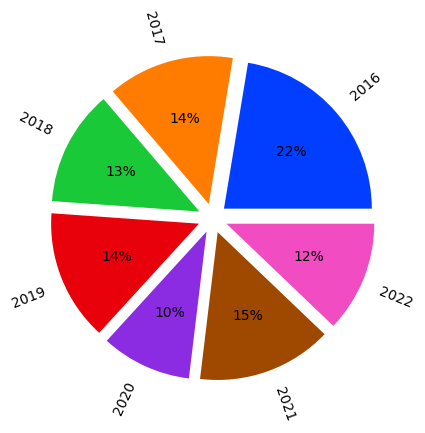

In [59]:
#Pie chart in Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn color palette to plot pie chart
colors = sns.color_palette('bright')
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


# create pie chart using matplotlib
plt.pie(total_tournage, labels=total_tournage.index, colors=colors,
        autopct='%.0f%%', explode=explode, shadow=False, rotatelabels='true')
plt.show()

In [27]:
df.value_counts("Année du tournage").sort_values(ascending=False)


Année du tournage
2016    2660
2021    1847
2019    1760
2017    1743
2018    1577
2022    1499
2020    1177
Name: count, dtype: int64

In [61]:
total_code_postal = df.value_counts("Code postal").sort_index()
total_code_postal


Code postal
75001.0     696
75002.0     294
75003.0     229
75004.0     651
75005.0     627
75006.0     459
75007.0     630
75008.0     765
75009.0     624
75010.0     726
75011.0     569
75012.0     576
75013.0     653
75014.0     312
75015.0     354
75016.0     606
75017.0     374
75018.0    1011
75019.0     734
75020.0     576
75116.0     399
92170.0       1
92220.0       1
93000.0       1
93200.0       1
93320.0       1
93500.0       5
94320.0       4
Name: count, dtype: int64

In [63]:
df.value_counts("Code postal").sort_values(ascending=False)


Code postal
75018.0    1011
75008.0     765
75019.0     734
75010.0     726
75001.0     696
75013.0     653
75004.0     651
75007.0     630
75005.0     627
75009.0     624
75016.0     606
75012.0     576
75020.0     576
75011.0     569
75006.0     459
75116.0     399
75017.0     374
75015.0     354
75014.0     312
75002.0     294
75003.0     229
93500.0       5
94320.0       4
92170.0       1
92220.0       1
93000.0       1
93200.0       1
93320.0       1
Name: count, dtype: int64

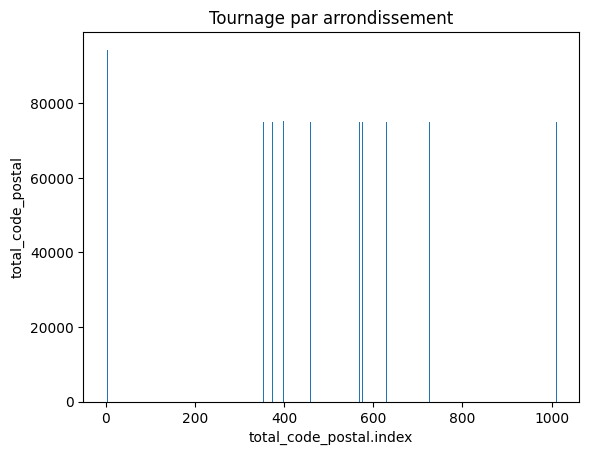

In [65]:
import matplotlib.pyplot as plt

# Création du barplot
plt.bar(total_code_postal, total_code_postal.index)

# Ajout de titres et d'étiquettes
plt.title('Tournage par arrondissement')
plt.xlabel('total_code_postal.index')
plt.ylabel('total_code_postal')

# Affichage du plot
plt.show()

In [30]:
df.value_counts("Type de tournage").sort_index()


Type de tournage
Long métrage    6473
Série TV        4591
Série Web        547
Téléfilm         652
Name: count, dtype: int64

,Année du tournage,Code postal,Coordonnée en X,Coordonnée en Y
count,12263.000000,12262.000000,12263.000000,1.226300e+04
mean,2018.700318,75037.073316,79656.907345,8.389132e+05
std,2.087697,646.166268,213460.945592,2.247996e+06
min,2016.000000,75001.000000,2.229019,4.876419e+01
25%,2017.000000,75007.000000,2.330313,4.885312e+01
50%,2019.000000,75011.000000,2.349325,4.886647e+01
75%,2021.000000,75017.000000,2.380158,4.888235e+01
max,2022.000000,94320.000000,660955.660000,6.867668e+06
